<a href="https://colab.research.google.com/github/CopotronicRifat/CS-5783-Machine-Learning-Assignments/blob/main/ML_ASSIGNMENT_03_PROBLEM_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')/255.0
y_train = to_categorical(y_train)

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# A Regular CNN

model1 = Sequential([
                    Conv2D(2, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    
                    Conv2D(3, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    
                    Conv2D(4, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    
                    Conv2D(5, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    
                    Conv2D(6, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    
                    Conv2D(7, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    
                    Conv2D(8, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    
                    Conv2D(9, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    
                    Conv2D(10, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    MaxPooling2D((2, 2)),
                    Conv2D(11, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    MaxPooling2D((2, 2)),
                    Flatten(),
                    Dense(100, activation = 'relu'),
                    Dense(10, activation = 'softmax')
])

In [5]:
optimizer = SGD(learning_rate = 0.01, momentum = 0.9)

model1.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
              )

In [6]:
history = model1.fit(x_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 18s 5ms/step - loss: 0.6291 - accuracy: 0.7940
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2351 - accuracy: 0.9284
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1837 - accuracy: 0.9442
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1698 - accuracy: 0.9484
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1637 - accuracy: 0.9506
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1535 - accuracy: 0.9528
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1403 - accuracy: 0.9580
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1382 - accuracy: 0.9585
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1315 - accuracy: 0.9601
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.12

In [7]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 2)         20        
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 3)         57        
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 4)         112       
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 5)         185       
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 6)         276       
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 7)         385       
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 8)         5

1875/1875 [==============================] - 6s 3ms/step - loss: 0.1043 - accuracy: 0.9687


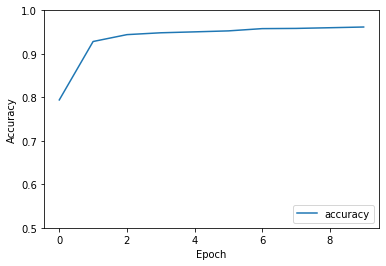

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model1.evaluate(x_train, y_train)

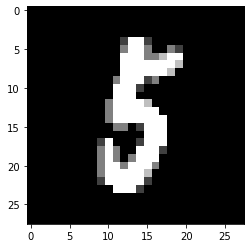

1/1 [==============================] - 0s 307ms/step
Prediction:  5


In [9]:
image = random.choice(x_test)
plt.imshow(image, cmap = plt.get_cmap('gray'))
plt.show()
image = (image.reshape((1, 28, 28, 1))).astype('float32')/255.0
digit = np.argmax(model1.predict(image)[0], axis = -1)
print("Prediction: ", digit)

In [10]:
# An Inverted CNN

model2 = Sequential([
                    Conv2D(11, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    
                    Conv2D(10, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    
                    Conv2D(9, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    
                    Conv2D(8, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    
                    Conv2D(7, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    
                    Conv2D(6, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    
                    Conv2D(5, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    
                    Conv2D(4, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    
                    Conv2D(3, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    MaxPooling2D((2, 2)),
                    Conv2D(2, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    MaxPooling2D((2, 2)),
                    Flatten(),
                    Dense(100, activation = 'relu'),
                    Dense(10, activation = 'softmax')
])

In [11]:
optimizer = SGD(learning_rate = 0.01, momentum = 0.9)

model2.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
              )

In [12]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 11)        110       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 10)        1000      
                                                                 
 conv2d_12 (Conv2D)          (None, 22, 22, 9)         819       
                                                                 
 conv2d_13 (Conv2D)          (None, 20, 20, 8)         656       
                                                                 
 conv2d_14 (Conv2D)          (None, 18, 18, 7)         511       
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 6)         384       
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 5)        

In [13]:
history = model2.fit(x_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 1.3232 - accuracy: 0.5013
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.8800 - accuracy: 0.6904
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.7862 - accuracy: 0.7275
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.7886 - accuracy: 0.7270
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.6756 - accuracy: 0.3706
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3062 - accuracy: 0.1049
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3041 - accuracy: 0.1073
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3040 - accuracy: 0.1063
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3035 - accuracy: 0.1080
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.1022


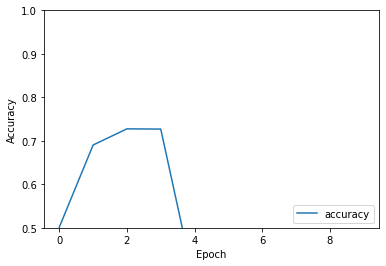

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(x_train, y_train)

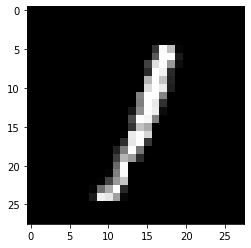

1/1 [==============================] - 0s 269ms/step
Prediction:  3


In [15]:
image = random.choice(x_test)
plt.imshow(image, cmap = plt.get_cmap('gray'))
plt.show()
image = (image.reshape((1, 28, 28, 1))).astype('float32')/255.0
digit = np.argmax(model2.predict(image)[0], axis = -1)
print("Prediction: ", digit)

In [16]:
# Hourglass Shape CNN

model3 = Sequential([
                    Conv2D(2, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    
                    Conv2D(3, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    
                    Conv2D(4, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    
                    Conv2D(5, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    
                    Conv2D(6, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    
                    Conv2D(7, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    
                    Conv2D(6, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    
                    Conv2D(5, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    
                    Conv2D(4, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    MaxPooling2D((2, 2)),
                     
                    Conv2D(3, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                    MaxPooling2D((2, 2)),
                     
                    Flatten(),
                     
                    Dense(100, activation = 'relu'),
                    Dense(10, activation = 'softmax')
])

In [17]:
optimizer = SGD(learning_rate = 0.01, momentum = 0.9)

model3.compile(optimizer = optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
              )

In [18]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 2)         20        
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 3)         57        
                                                                 
 conv2d_22 (Conv2D)          (None, 22, 22, 4)         112       
                                                                 
 conv2d_23 (Conv2D)          (None, 20, 20, 5)         185       
                                                                 
 conv2d_24 (Conv2D)          (None, 18, 18, 6)         276       
                                                                 
 conv2d_25 (Conv2D)          (None, 16, 16, 7)         385       
                                                                 
 conv2d_26 (Conv2D)          (None, 14, 14, 6)        

In [19]:
history = model3.fit(x_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.2290 - accuracy: 0.5650
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7632 - accuracy: 0.7609
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7092 - accuracy: 0.7781
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6795 - accuracy: 0.7872
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6810 - accuracy: 0.7897
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6833 - accuracy: 0.7886
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7672 - accuracy: 0.7598
Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.8883 - accuracy: 0.7122
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7712 - accuracy: 0.7595
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

1875/1875 [==============================] - 6s 3ms/step - loss: 1.3310 - accuracy: 0.5231


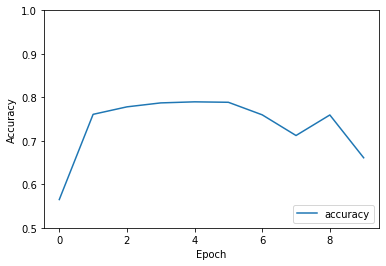

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model3.evaluate(x_train, y_train)

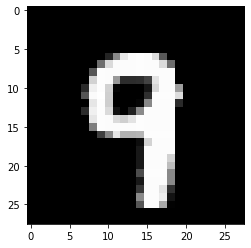

1/1 [==============================] - 0s 274ms/step
Prediction:  9


In [21]:
image = random.choice(x_test)
plt.imshow(image, cmap = plt.get_cmap('gray'))
plt.show()
image = (image.reshape((1, 28, 28, 1))).astype('float32')/255.0
digit = np.argmax(model3.predict(image)[0], axis = -1)
print("Prediction: ", digit)

In [22]:
learningrates_list = [0.001,0.01,0.1,1.0]

In [25]:
import keras

for i in range(len(learningrates_list)):
    
    optimizer = keras.optimizers.Adam(lr = learningrates_list[i])
    model1.compile(loss='mse', optimizer=optimizer)
    history = model1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0025 - val_loss: 27.3396
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0024 - val_loss: 27.3393
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0023 - val_loss: 27.3395
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0024 - val_loss: 27.3394
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0023 - val_loss: 27.3395
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0023 - val_loss: 27.3396
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0024 - val_loss: 27.3395
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0023 - val_loss: 27.3396
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0025 - val_loss: 27.3394
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/s

In [26]:
import keras

for i in range(len(learningrates_list)):
    
    optimizer = keras.optimizers.Adam(lr = learningrates_list[i])
    model2.compile(loss='mse', optimizer=optimizer)
    history = model1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
   1/1875 [..............................] - ETA: 20s - loss: 0.1750

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 10s 5ms/step - loss: 0.1803 - val_loss: 27.3403
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1803 - val_loss: 27.3403
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1803 - val_loss: 27.3403
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1803 - val_loss: 27.3403
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1803 - val_loss: 27.3403
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1803 - val_loss: 27.3403
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1803 - val_loss: 27.3403
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1803 - val_loss: 27.3403
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1803 - val_loss: 27.3403
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - los

In [27]:
import keras

for i in range(len(learningrates_list)):
    
    optimizer = keras.optimizers.Adam(lr = learningrates_list[i])
    model3.compile(loss='mse', optimizer=optimizer)
    history = model1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1803 - val_loss: 27.3403
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1803 - val_loss: 27.3403
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1803 - val_loss: 27.3403
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1803 - val_loss: 27.3403
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1803 - val_loss: 27.3403
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1803 - val_loss: 27.3403
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1803 - val_loss: 27.3403
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1803 - val_loss: 27.3403
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1803 - val_loss: 27.3403
Epoch 10/10
1875/1875 [==============================] - 10s 5ms

**For model 01:**

I have examined 0.001, 0.01, 0.1, 1.0 as the learning rates.
According to validation loss, after 25 epochs-

The model with 0.001 got less loss in validation.

In [28]:
batchsize_list = [8, 16, 32, 64, 128]

In [29]:
import keras

for i in range(len(learningrates_list)):
    optimizer = keras.optimizers.Adam(lr = learningrates_list[i])
    model1.compile(loss='mse', optimizer=optimizer)
    history = model1.fit(x_train, y_train, epochs = 10, batch_size = batchsize_list[i])

Epoch 1/10
7500/7500 [==============================] - 34s 4ms/step - loss: 0.1803
Epoch 2/10
7500/7500 [==============================] - 37s 5ms/step - loss: 0.1803
Epoch 3/10
7500/7500 [==============================] - 36s 5ms/step - loss: 0.1803
Epoch 4/10
7500/7500 [==============================] - 38s 5ms/step - loss: 0.1803
Epoch 5/10
7500/7500 [==============================] - 37s 5ms/step - loss: 0.1803
Epoch 6/10
7500/7500 [==============================] - 39s 5ms/step - loss: 0.1803
Epoch 7/10
7500/7500 [==============================] - 37s 5ms/step - loss: 0.1803
Epoch 8/10
7500/7500 [==============================] - 34s 4ms/step - loss: 0.1803
Epoch 9/10
7500/7500 [==============================] - 33s 4ms/step - loss: 0.1803
Epoch 10/10
7500/7500 [==============================] - 34s 4ms/step - loss: 0.1803
Epoch 1/10
3750/3750 [==============================] - 18s 5ms/step - loss: 0.1803
Epoch 2/10
3750/3750 [==============================] - 18s 5ms/step - loss

In [30]:
import keras

for i in range(len(learningrates_list)):
    optimizer = keras.optimizers.Adam(lr = learningrates_list[i])
    model2.compile(loss='mse', optimizer=optimizer)
    history = model2.fit(x_train, y_train, epochs = 10, batch_size = batchsize_list[i])

Epoch 1/10
7500/7500 [==============================] - 34s 4ms/step - loss: 0.1805
Epoch 2/10
7500/7500 [==============================] - 33s 4ms/step - loss: 0.1805
Epoch 3/10
7500/7500 [==============================] - 33s 4ms/step - loss: 0.1805
Epoch 4/10
7500/7500 [==============================] - 34s 5ms/step - loss: 0.1805
Epoch 5/10
7500/7500 [==============================] - 35s 5ms/step - loss: 0.1805
Epoch 6/10
7500/7500 [==============================] - 34s 5ms/step - loss: 0.1805
Epoch 7/10
7500/7500 [==============================] - 34s 5ms/step - loss: 0.1805
Epoch 8/10
7500/7500 [==============================] - 35s 5ms/step - loss: 0.1805
Epoch 9/10
7500/7500 [==============================] - 34s 5ms/step - loss: 0.1805
Epoch 10/10
7500/7500 [==============================] - 35s 5ms/step - loss: 0.1805
Epoch 1/10
3750/3750 [==============================] - 22s 6ms/step - loss: 0.1805
Epoch 2/10
3750/3750 [==============================] - 21s 6ms/step - loss

In [31]:
import keras

for i in range(len(learningrates_list)):
    optimizer = keras.optimizers.Adam(lr = learningrates_list[i])
    model3.compile(loss='mse', optimizer=optimizer)
    history = model3.fit(x_train, y_train, epochs = 10, batch_size = batchsize_list[i])

Epoch 1/10
7500/7500 [==============================] - 33s 4ms/step - loss: 0.1803
Epoch 2/10
7500/7500 [==============================] - 32s 4ms/step - loss: 0.1803
Epoch 3/10
7500/7500 [==============================] - 33s 4ms/step - loss: 0.1803
Epoch 4/10
7500/7500 [==============================] - 32s 4ms/step - loss: 0.1803
Epoch 5/10
7500/7500 [==============================] - 32s 4ms/step - loss: 0.1803
Epoch 6/10
7500/7500 [==============================] - 32s 4ms/step - loss: 0.1803
Epoch 7/10
7500/7500 [==============================] - 32s 4ms/step - loss: 0.1803
Epoch 8/10
7500/7500 [==============================] - 32s 4ms/step - loss: 0.1803
Epoch 9/10
7500/7500 [==============================] - 33s 4ms/step - loss: 0.1803
Epoch 10/10
7500/7500 [==============================] - 32s 4ms/step - loss: 0.1803
Epoch 1/10
3750/3750 [==============================] - 20s 5ms/step - loss: 0.1803
Epoch 2/10
3750/3750 [==============================] - 20s 5ms/step - loss

I have trive multiple batch size. According to the loss value, the batch size has no significant impact on model.

In [32]:
# ADAM optimizer is not running again as it has run before in the previous code segments

model2.compile(loss='categorical_crossentropy', optimizer='SGD')
history = model2.fit(x_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 12.2290
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3051
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3051
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3050
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3049
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3052
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3052
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3054
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3053
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3052


In [33]:
model2.compile(loss='categorical_crossentropy', optimizer='RMSProp')
history = model2.fit(x_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 1.1243
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.0235
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.9641
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.9255
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8998
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8712
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8431
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.8146
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7909
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7630


In [34]:
model3.compile(loss='categorical_crossentropy', optimizer='SGD')
history = model3.fit(x_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3049
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3052
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3051
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3052
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3049
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3051
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3053
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3052
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3047
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3053


In [35]:
model3.compile(loss='categorical_crossentropy', optimizer='RMSProp')
history = model3.fit(x_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.7430
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7255
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7026
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6799
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6654
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6431
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6197
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6064
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5913
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5810


We can see from the result that, among three optimizer, RMSProp is getting better result in terms of validation loss.